In [2]:
from sklearn.datasets import make_regression
import numpy as np

In [4]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)import matplotlib.pyplot as plt
plt.scatter(X,y)

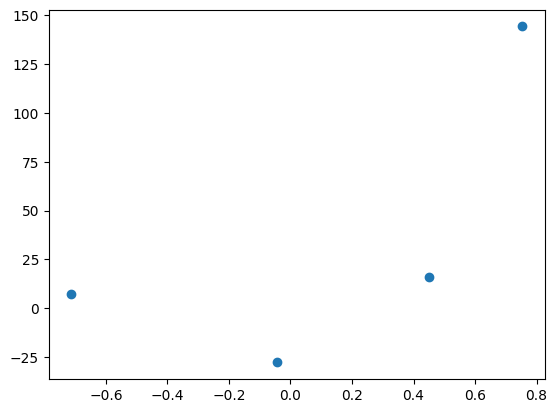

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [8]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
reg.coef_

array([78.35063668])

In [14]:
reg.intercept_

26.15963284313262

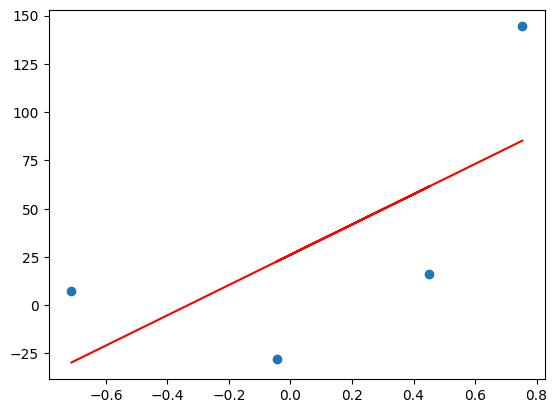

In [16]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [18]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(4)

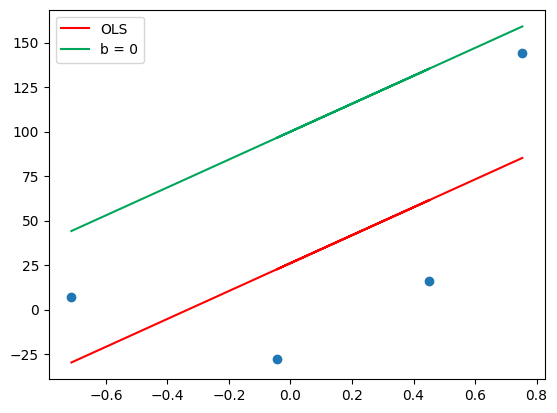

In [20]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [24]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [26]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [28]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

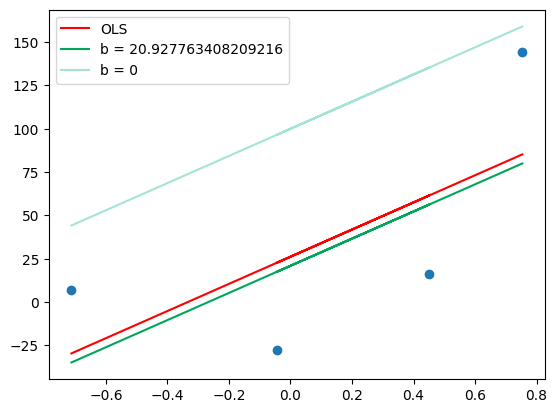

In [30]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [32]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [34]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [36]:
b = b - step_size
b

25.11331608985106

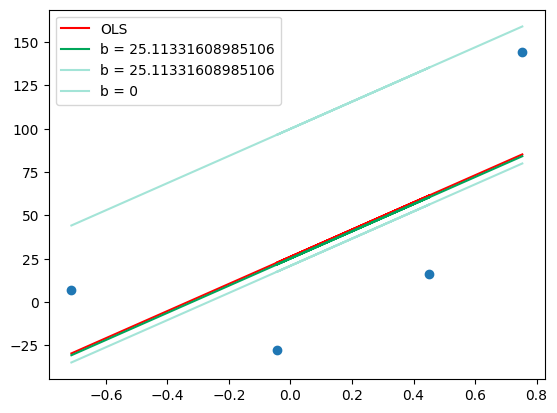

In [38]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [40]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [42]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [44]:
b = b - step_size
b

25.95042662617943

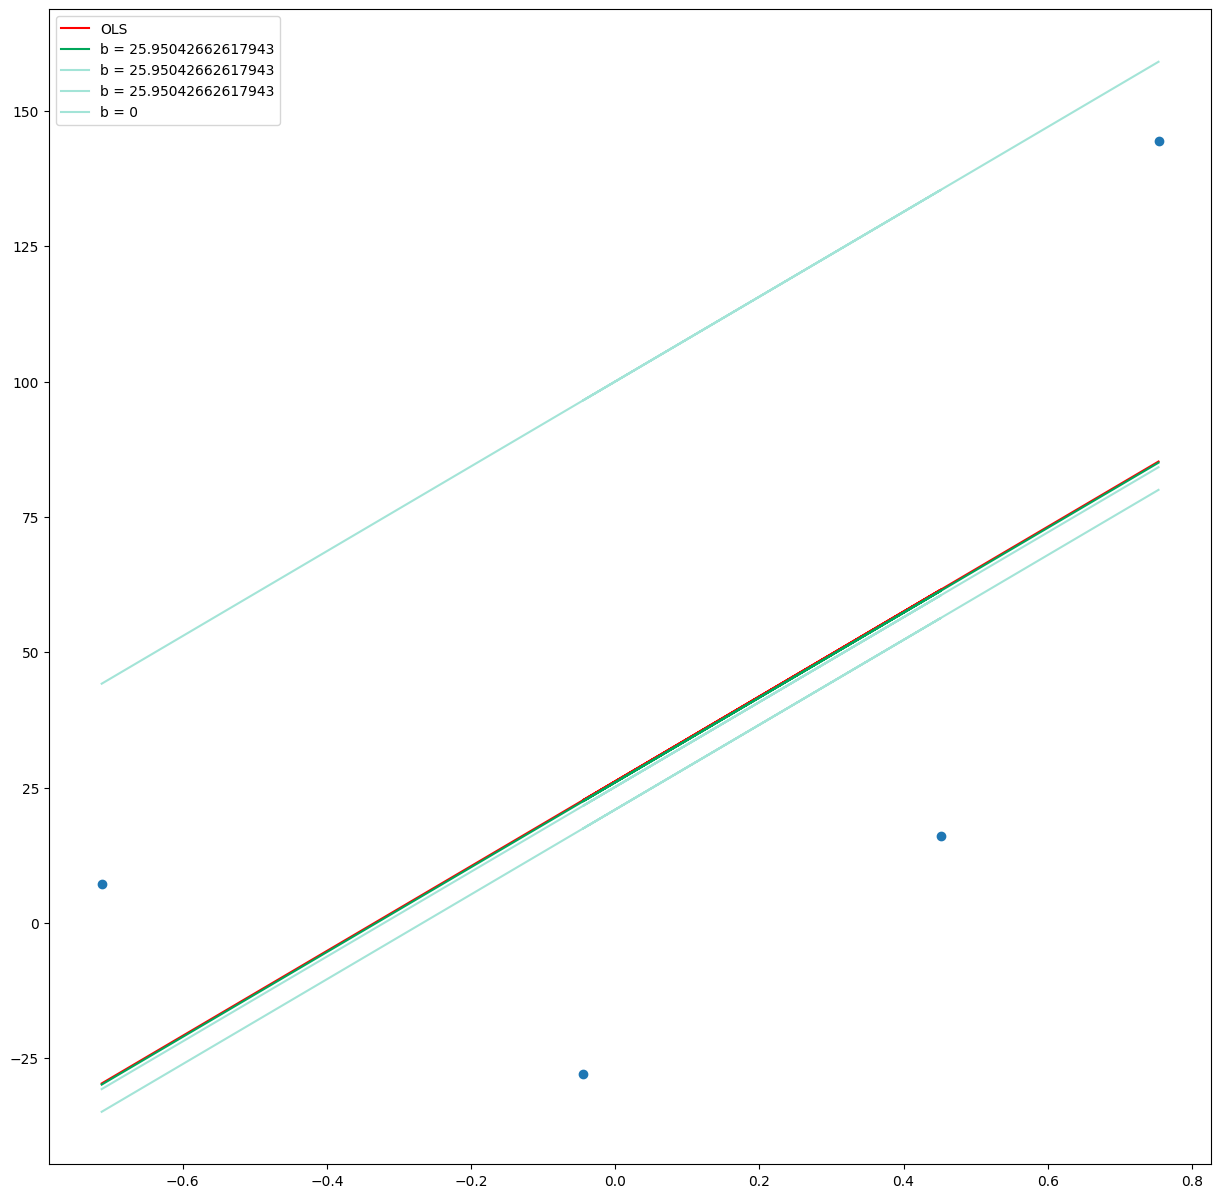

In [46]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

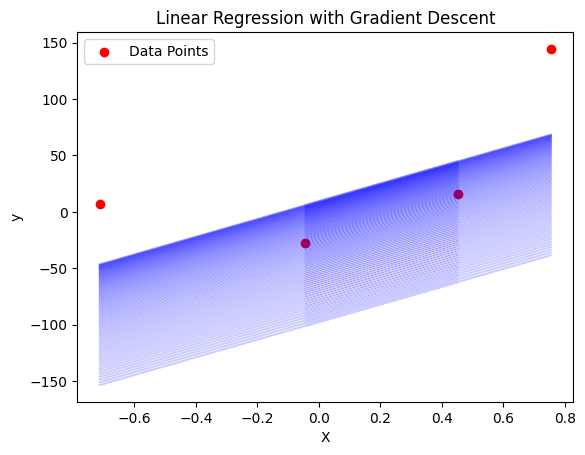

In [50]:
b = -100       # Initial bias
m = 78.35      # Initial slope
lr = 0.01      # Learning rate
epochs = 100   # Number of iterations

# Flattening X and y for simplicity in calculation
X = X.ravel()
y = y.ravel()

for i in range(epochs):
    # Compute loss slope
    loss_slope = -2 * np.sum(y - (m * X + b)) / len(X)
    
    # Update bias
    b = b - (lr * loss_slope)
    
    # Calculate predictions
    y_pred = m * X + b
    
    # Plot predictions during each epoch
    plt.plot(X, y_pred, color='blue', alpha=0.2)

# Plot the data points
plt.scatter(X, y, color='red', label='Data Points')
plt.title("Linear Regression with Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()